# PROBLEM STATEMENT

•  A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. 

•  The company wants to know: <br>
o Which variables are significant in predicting the price of a house <br>
o How well those variables describe the price of a house.

•  Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not by using the available independent variables

•  This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  
import warnings
warnings.filterwarnings('ignore')

# LOADING DATA

In [2]:
housing_1 = pd.read_csv('train.csv')
print(housing_1.shape)
housing_1.head(2)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

##### Checking for duplicates and dropping the duplicate row if any

In [3]:
print(housing_1.shape)
housing_1.drop_duplicates(subset=None, inplace=True)
print(housing_1.shape)

(1460, 81)
(1460, 81)


There are no duplicate values

#####  Checking for data types of all columns

In [4]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Checking statistical information

In [5]:
housing_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#####  Checking missing values in dataset if any

In [6]:
print(housing_1.isnull().values.sum())
# percentage of missing values in each column
print(round(round(100*(housing_1.isnull().sum()/len(housing_1)), 2).sort_values()).sum())
print((round(100*(housing_1.isnull().sum()/len(housing_1)), 2).sort_values(ascending=False)).head(20))

6965
483.0
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64


##### Checking if null Values have any impact on the Sale Price or not

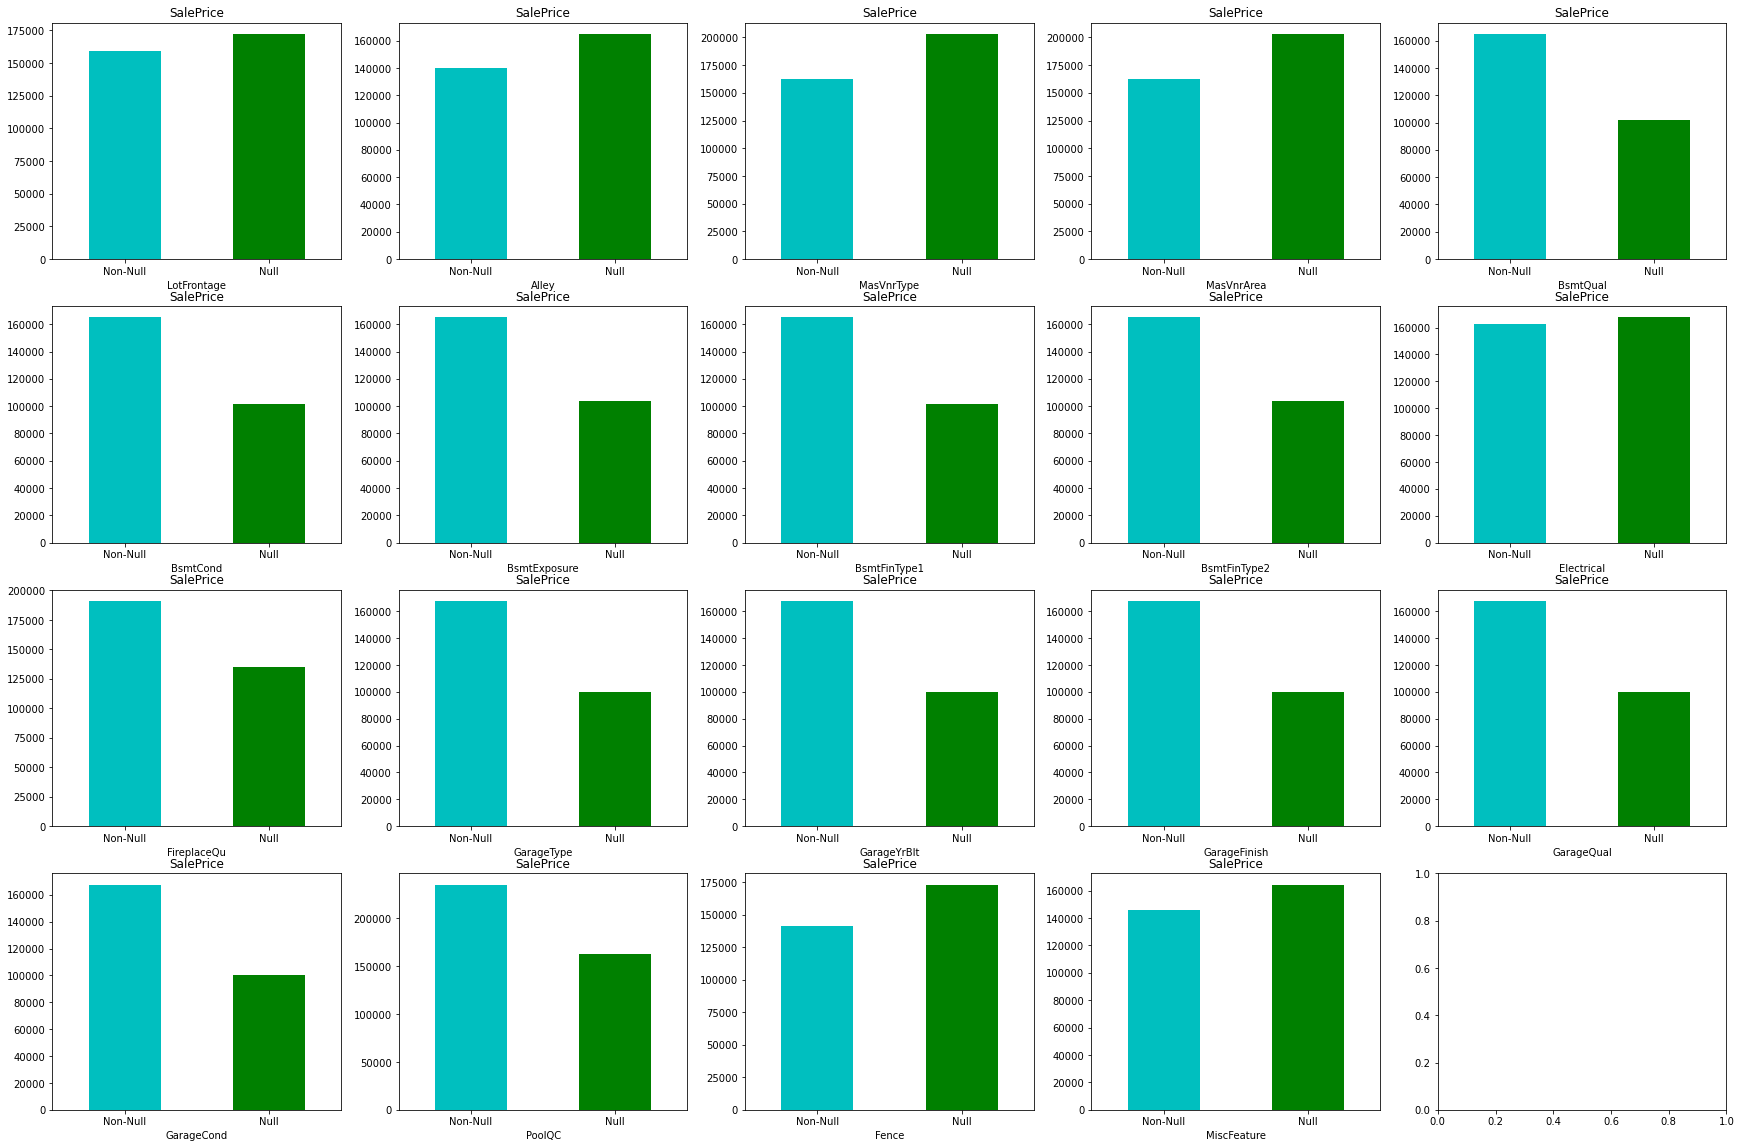

In [7]:
nan_col = []
for i in housing_1.columns:
    if housing_1[i].isnull().sum() > 0:
        nan_col.append(i)
housing_2_copy = housing_1.copy()    
fig,axs= plt.subplots(4,5,figsize=(30,20),squeeze=True)
for i,ax in zip(nan_col,axs.flatten()):    
    housing_2_copy[i] = np.where(housing_2_copy[i].isnull(), 'Null', 'Non-Null') 
    housing_2_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('cg'),rot=0,ax=ax,subplots=True)
plt.show()

#####  Drop the columns where missing % is more than 50% and unecessary columns

In [8]:
print(housing_1.shape)
housing_2 = housing_1.copy()
housing_2 = housing_2.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','Id'],axis = 1)
print(housing_2.shape)
housing_2.head(2)

(1460, 81)
(1460, 74)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500


#### Checking data skewness for all the numeric columns

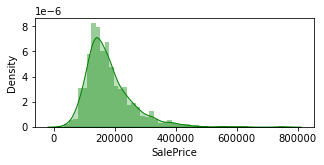

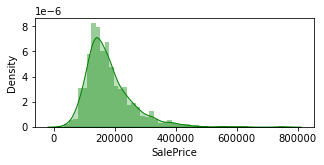

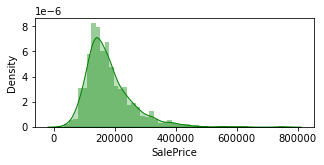

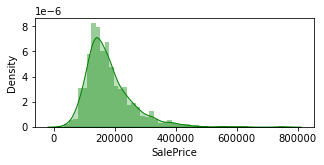

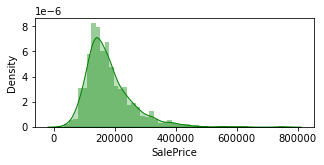

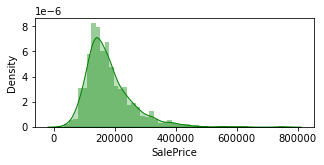

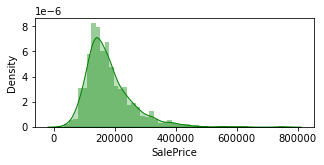

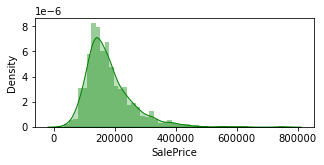

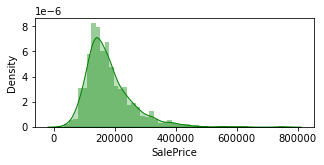

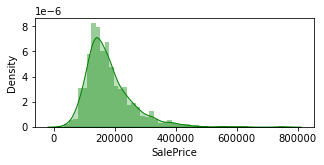

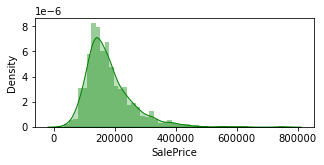

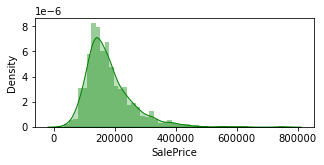

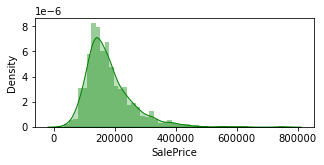

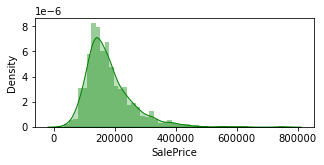

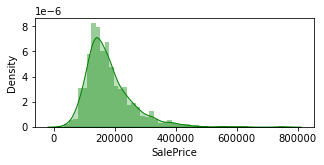

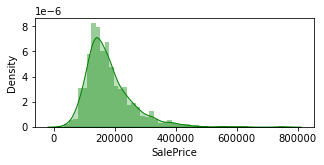

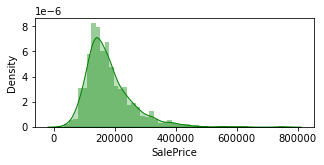

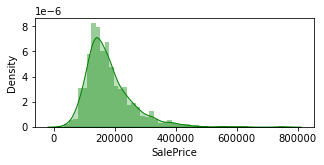

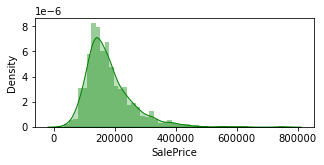

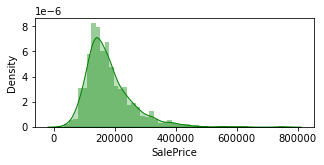

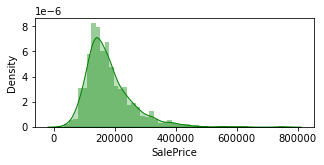

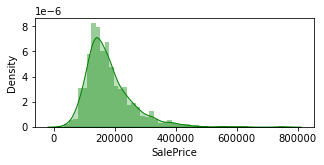

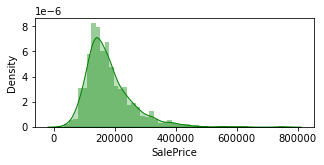

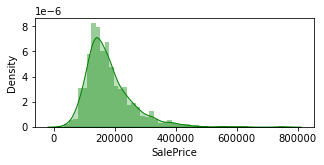

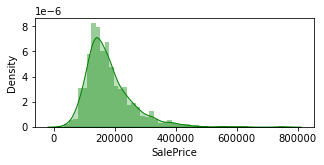

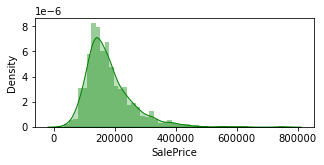

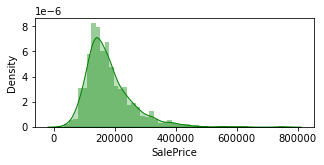

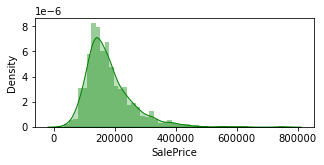

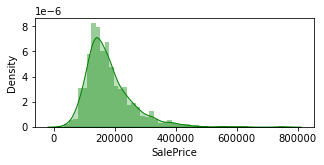

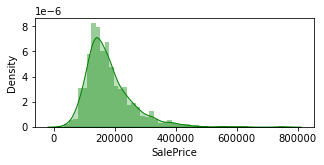

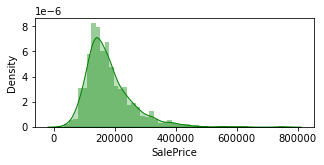

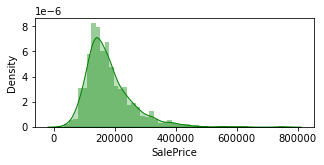

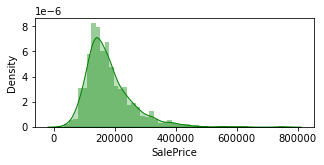

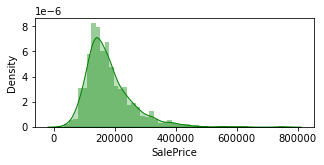

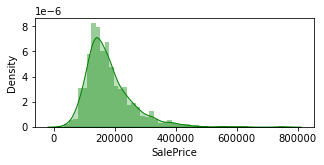

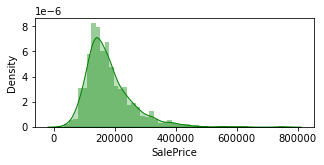

In [9]:
num_col = housing_2.iloc[:, (np.where((housing_2.dtypes == np.int64) | (housing_2.dtypes == np.float64)))[0]].columns

for col in num_col:
    plt.figure(figsize=(5,2))
    sns.distplot(housing_2.SalePrice ,color="g", kde_kws={"shade": True})
    plt.show()  

Many features are right side-skewed

##### Dropping all the feature which are skewed

In [10]:
# Finding 90% thresold value
thres = len(housing_2)*0.90
print(thres)

#skewed feature
col_skew = []
for i in housing_2:
    if housing_2[i].value_counts().max() >= thres:
        col_skew.append(i)
        
print(col_skew)

# Dropping all the feature which is skewed
housing_3 = housing_2.copy()
housing_3.drop(col_skew, axis=1, inplace=True)
print(housing_2.shape)
print(housing_3.shape)

1314.0
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
(1460, 74)
(1460, 56)


#### Checking distribution of target variable

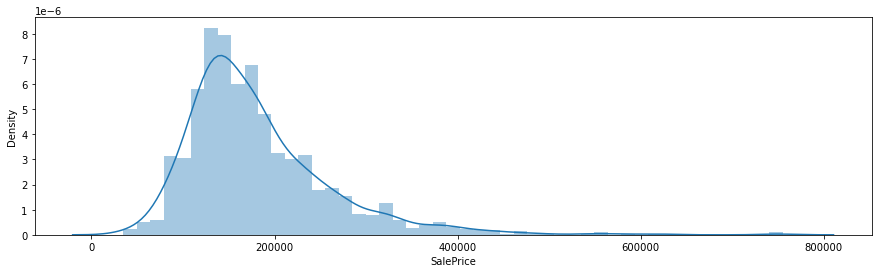

In [11]:
plt.figure(figsize=(15,4))
sns.distplot(housing_3.SalePrice)
plt.show()

##### Understanding effect of independant variables on target variable

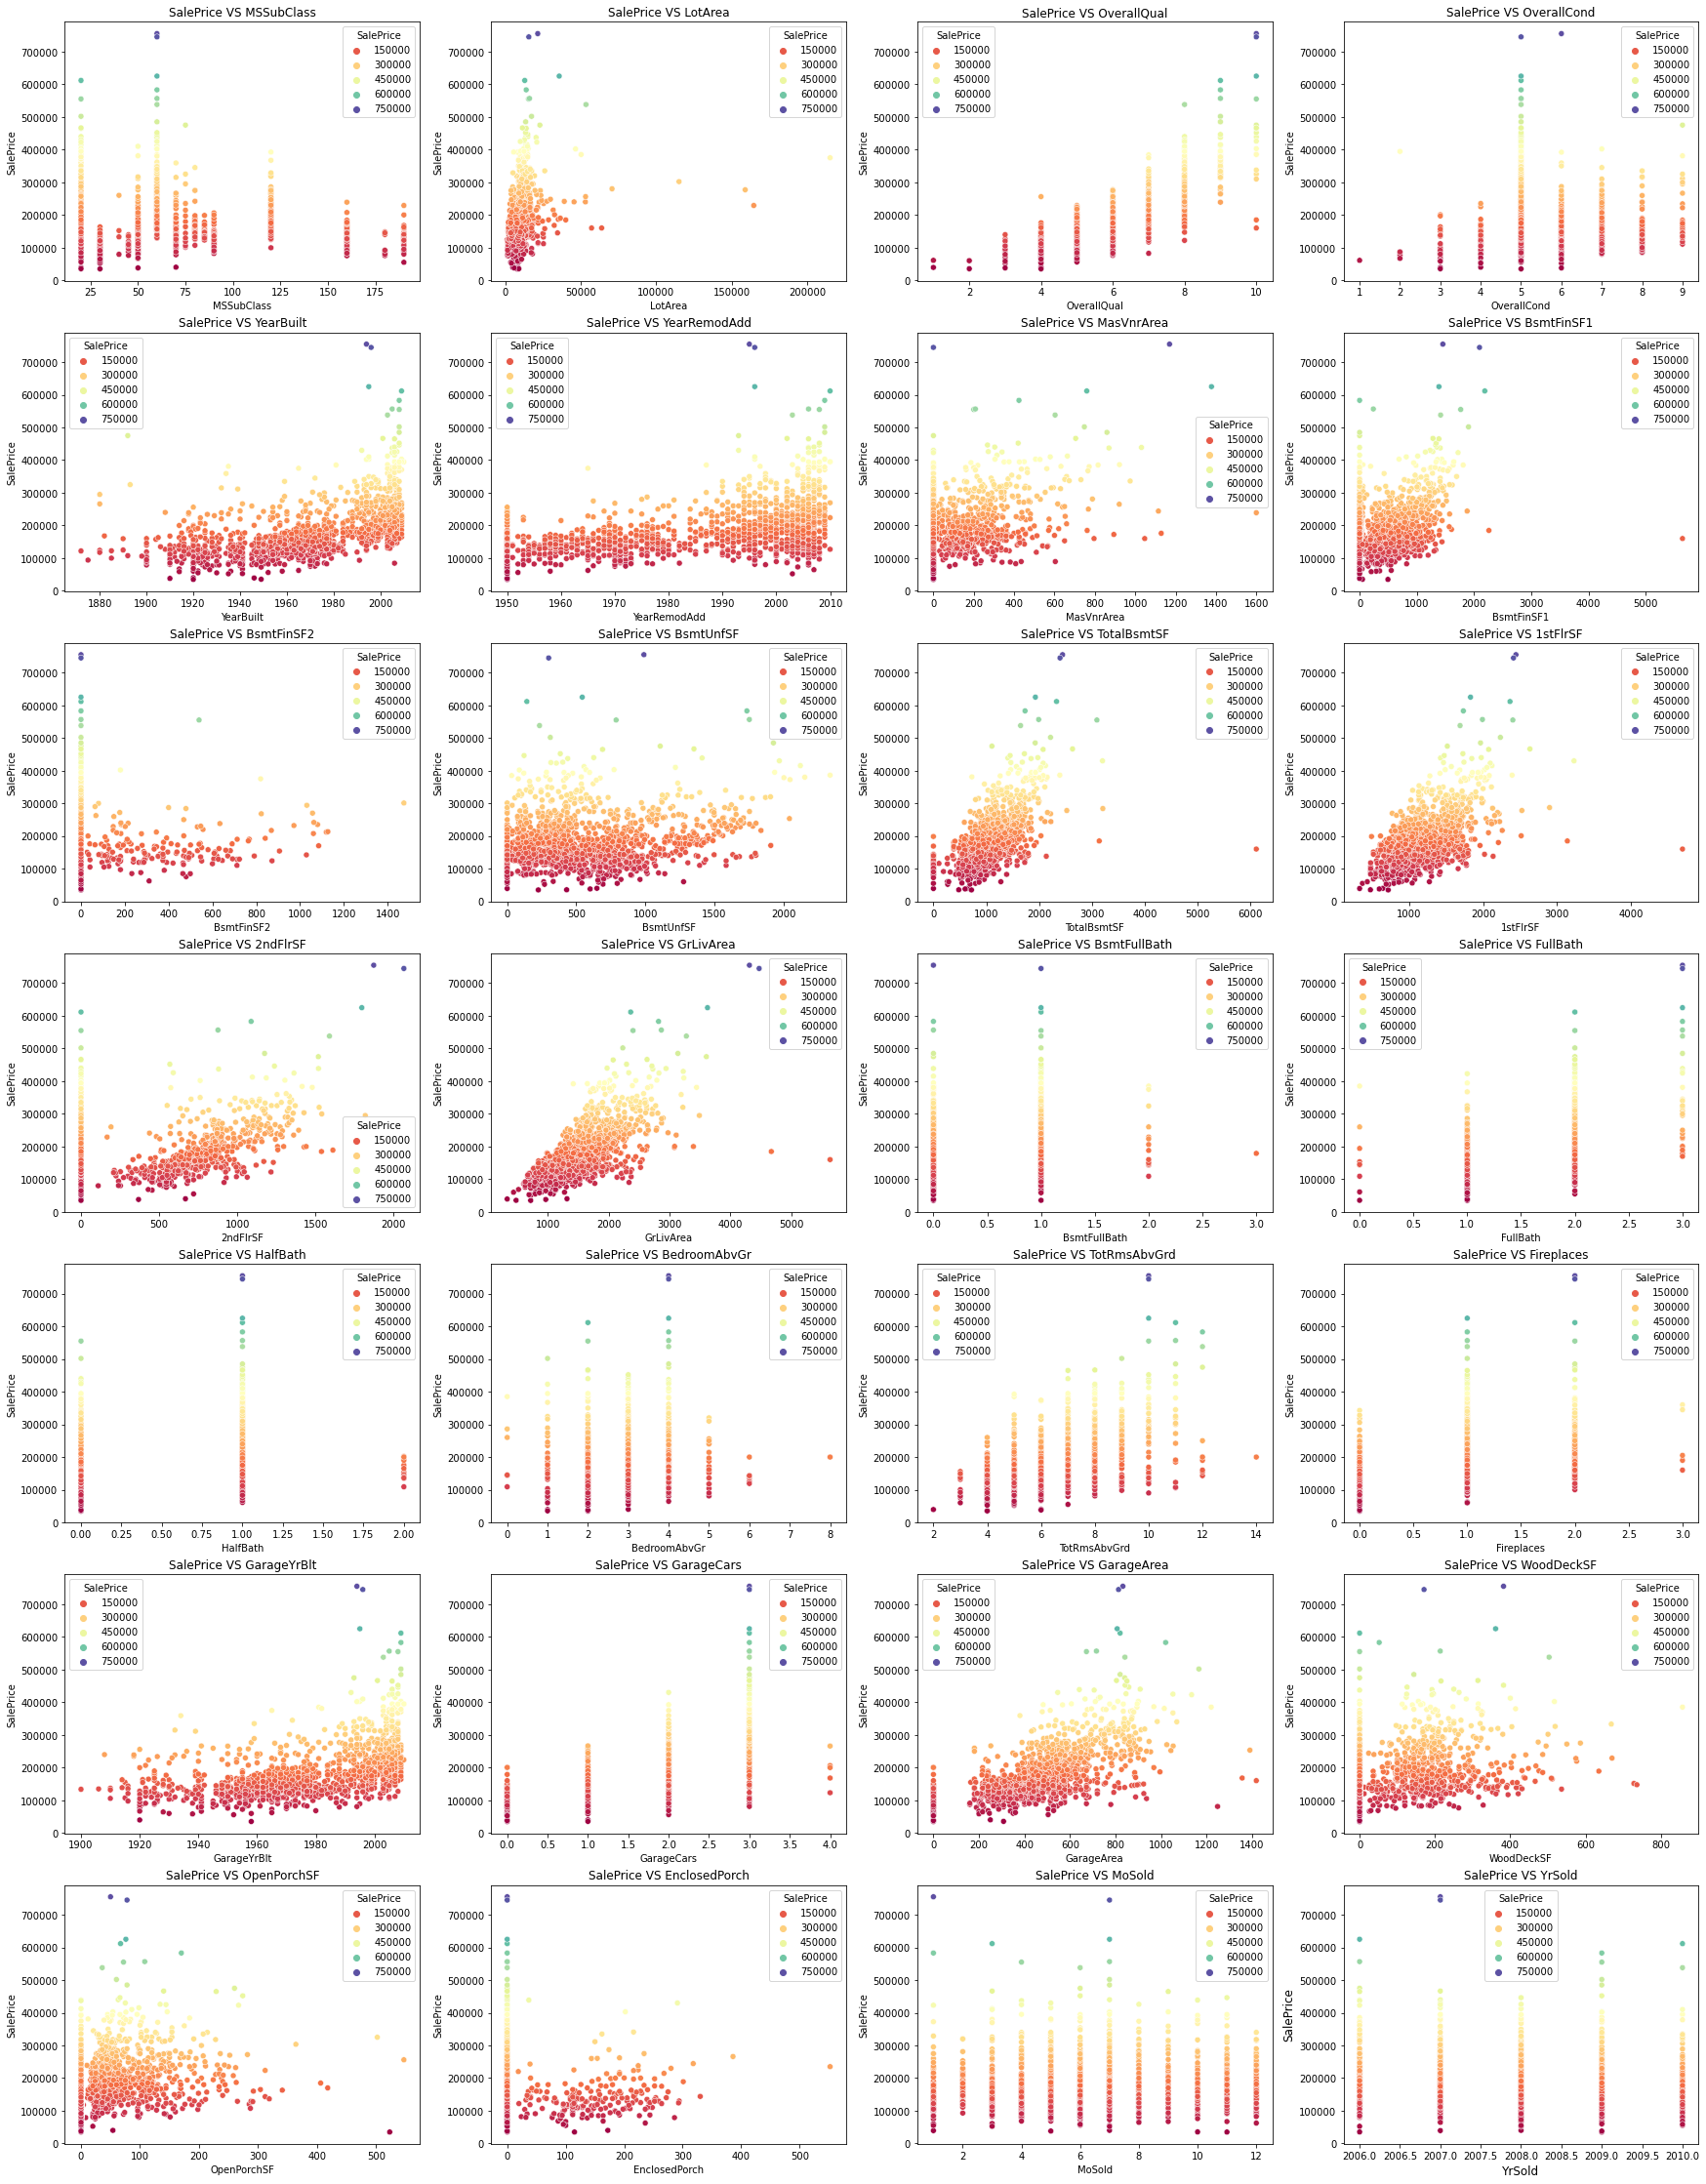

In [12]:
#numerical variables
housing_3_num = housing_3.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(7,4,figsize=(30,40))
for i,ax in zip(housing_3_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=housing_3_num,ax=ax,palette='Spectral')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

New properties are costlier than older properties.<br>
GRLiving Area has a direct corelation with the prIce of the property. <br>
Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property. <br>
Month sold has no effect on the price. <br>

Text(0.5, 1.0, 'House Price vs YearSold')

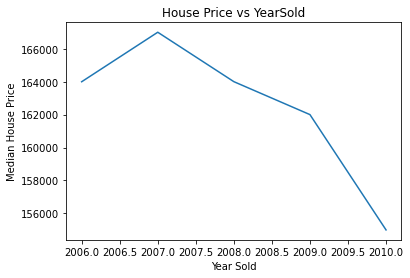

In [13]:
# Checking if the median price changes with the year sold
housing_3['YrSold'] = housing_3['YrSold'].astype('int')
housing_3.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

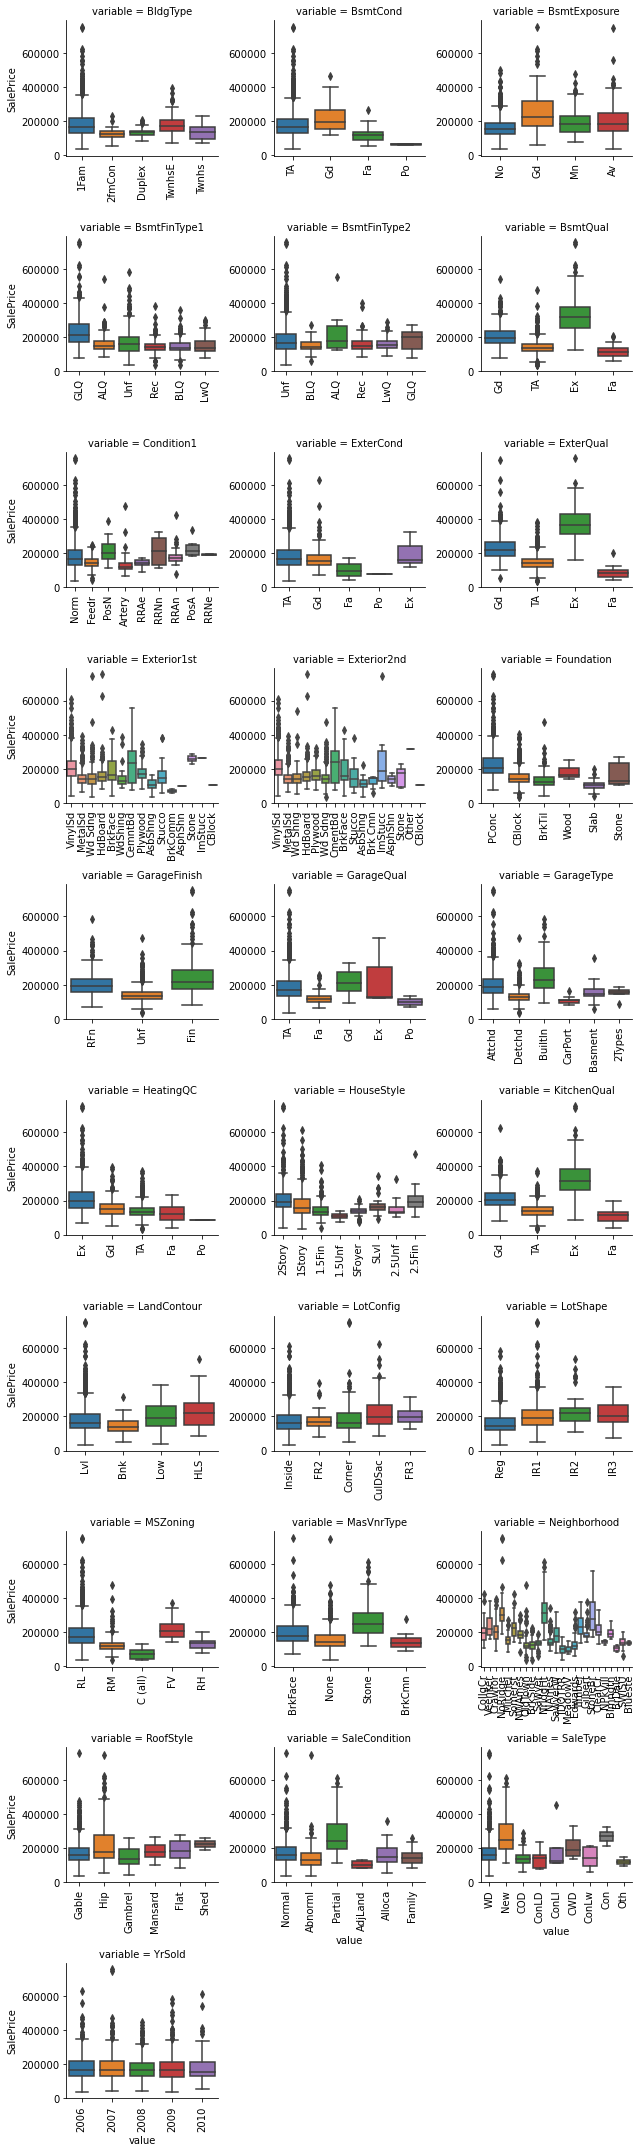

In [14]:
#categorical variables
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = housing_3.select_dtypes(exclude=['int64','float64'])
f = pd.melt(housing_3, id_vars=['SalePrice'], value_vars=sorted(housing_3[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=3)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are outliers in the dataset
Paved alleys properties demand a higher price. <br>
Houses where the basement quality is good and excellent are sold at higher prices compared to others. <br>
Houses with excellent quality kitchens also impact the price <br>
Houses with excellent garge quality have a impact on price <br>

##### Creating new features

In [15]:
# Deriving new features
housing_4 = housing_3.copy()
housing_4['YrSold_Old'] = housing_4.YrSold.max() - housing_4.YrSold
housing_4['YearRemodAdd_Old'] = housing_4.YearRemodAdd.max() - housing_4.YearRemodAdd
housing_4['YearBuilt_Old'] = housing_4.YearBuilt.max() - housing_4.YearBuilt
housing_4['GarageYrBlt_Old'] = housing_4.GarageYrBlt.max() - housing_4.GarageYrBlt

# Dropping the old features
housing_4.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)
print(housing_4.shape)
housing_4.head(2)

(1460, 56)


,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,YrSold_Old,YearRemodAdd_Old,YearBuilt_Old,GarageYrBlt_Old
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,...,61,0,2,WD,Normal,208500,2,7,7,7.0
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,...,0,0,5,WD,Normal,181500,3,34,34,34.0


#### Imputing missing values

In [16]:
print((round(100*(housing_4.isnull().sum()/len(housing_4)), 2).sort_values(ascending=False)).head(12))

# Imputing categorical feature with mode value
cat_var_list = ['GarageQual','GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond', 
               'BsmtQual','MasVnrType']

for col in cat_var_list:
    housing_4[col].fillna(housing_4[col].mode()[0], inplace=True)

print((round(100*(housing_4.isnull().sum()/len(housing_4)), 2).sort_values(ascending=False)).head(3))

# Replacing GarageYrBl_Old with -1 value as house with no garage should put negative impact on selling price of the Price
housing_4.GarageYrBlt_Old.fillna(-1,inplace=True)

# Imputing numeric feature with with mean value
housing_4.MasVnrArea.fillna(housing_4.MasVnrArea.mean(),inplace=True)

print(housing_4.isnull().sum().sum())

GarageYrBlt_Old    5.55
GarageQual         5.55
GarageType         5.55
GarageFinish       5.55
BsmtFinType2       2.60
BsmtExposure       2.60
BsmtFinType1       2.53
BsmtCond           2.53
BsmtQual           2.53
MasVnrArea         0.55
MasVnrType         0.55
WoodDeckSF         0.00
dtype: float64
GarageYrBlt_Old    5.55
MasVnrArea         0.55
HeatingQC          0.00
dtype: float64
0


All the null values are imputed

##### Removing outliers

In [17]:
num_col = []
cat_col = []
for i in housing_4.columns:
    if housing_4[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('Numerical features in the dataset :', len(num_col) ,num_col)
print('\nCategorical features in the dataset :', len(cat_col) ,cat_col)

Numerical features in the dataset : 29 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old']

Categorical features in the dataset : 27 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']


In [18]:
def drop_outliers(x):
    lists = []
    for col in num_col:
        Q1 = x[col].quantile(.25) 
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_5 = drop_outliers(housing_4)
print(housing_4.shape)
print(housing_5.shape)

(1460, 56)
(1417, 56)


##### Log Transformation - as target variable was right skewed

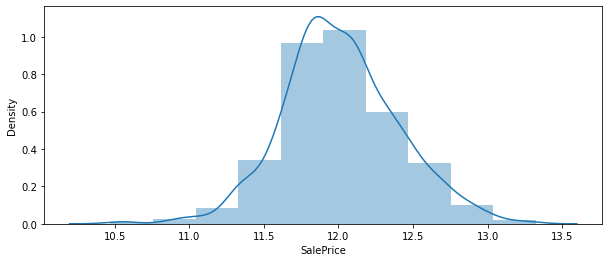

In [19]:
housing_5['SalePrice'] = np.log(housing_5.SalePrice)
plt.figure(figsize=(10,4))
sns.distplot(housing_5.SalePrice, bins=10)
plt.show()

##### Correlation between variables

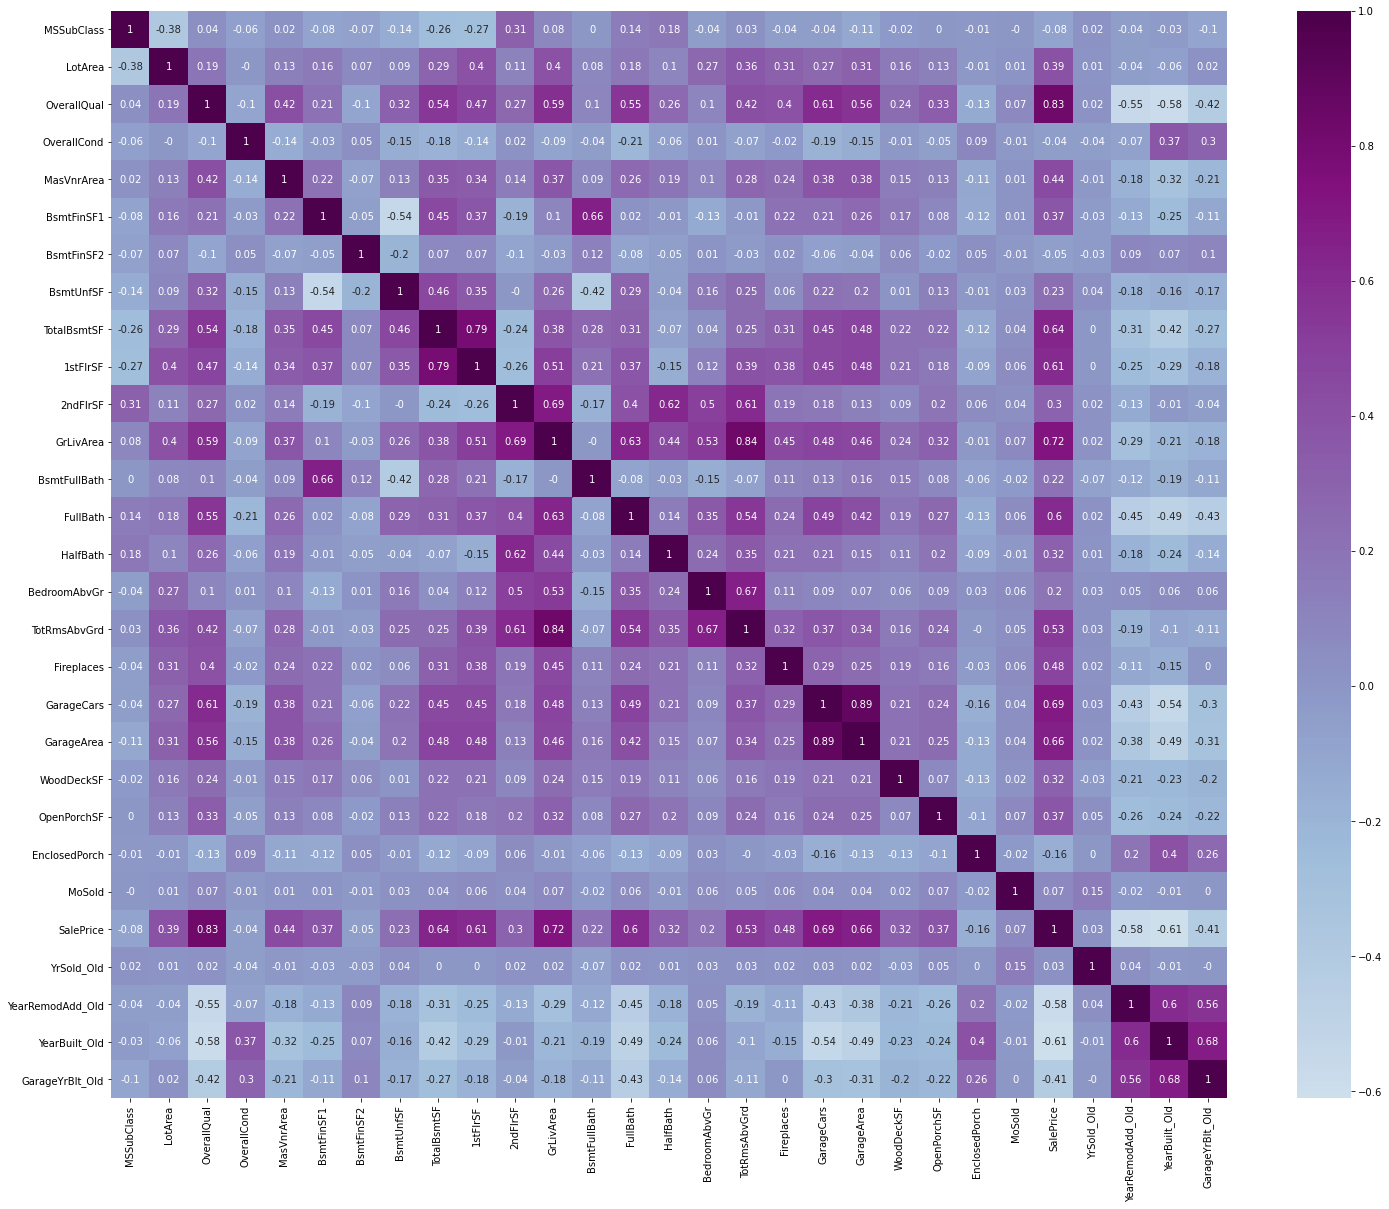

In [20]:
plt.subplots(figsize = (25,20))
sns.heatmap(round(housing_5.corr(),2), cmap='BuPu' , annot=True, center = 0)
plt.show()

##### Droping columns whose correlation is above 70%

In [21]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = housing_5.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

corr_features = correlation(housing_5, 0.7)
print(len(set(corr_features)))
print(corr_features)

housing_6 = housing_5.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'],axis=1)
print(housing_5.shape)
print(housing_6.shape)

4
{'TotRmsAbvGrd', '1stFlrSF', 'SalePrice', 'GarageArea'}
(1417, 56)
(1417, 53)


##### Variable encoding

In [22]:
# Ordinal categorical feature mapping
housing_7 = housing_6.copy()
housing_7['ExterQual'] = housing_7.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_7['ExterCond'] = housing_7.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_7['BsmtQual'] = housing_7.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_7['BsmtCond'] = housing_7.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_7['GarageQual'] = housing_7.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_7['BsmtExposure'] = housing_7.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_7['BsmtFinType1'] = housing_7.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_7['BsmtFinType2'] = housing_7.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_7['HeatingQC'] = housing_7.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_7['KitchenQual'] = housing_7.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_7['GarageFinish'] = housing_7.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})

# Dummy variable creation for nominal type
lst = ['LandContour','MSZoning','LotShape','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle',
       'Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','SaleType','SaleCondition']

dummy_col = pd.get_dummies(housing_7[lst],drop_first=True)
housing_7 = pd.concat([housing_7,dummy_col],axis='columns')
housing_7 = housing_7.drop(lst,axis='columns')

print(housing_6.shape , housing_7.shape)
housing_7.head(2)

(1417, 53) (1417, 154)


,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,3,2,4,3,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,2,2,4,3,4,...,0,0,0,0,1,0,0,0,1,0


# MODEL BUILDING

In [23]:
num_var = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
           'TotalBsmtSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces', 
           'GarageCars', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old',
           'YearBuilt_Old', 'GarageYrBlt_Old','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','BsmtExposure',
           'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageFinish']

##### Train test split

In [24]:
df_train, df_test = train_test_split(housing_7, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(991, 154)
(426, 154)


##### Rescaling the Features

In [25]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])
print(df_train.shape)
df_train.head(2)

(991, 154)


,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
829,0.823529,0.035223,0.666667,0.5,0.000000,0.666667,0.333333,0.666667,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0
128,0.235294,0.201796,0.555556,0.5,0.254059,0.333333,0.333333,0.333333,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0


##### Dividing into X(independent) and Y(dependent)

In [26]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(991,)
(991, 153)
(426, 153)
(426,)


## Recursive feature elimination

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#RFE
rfe = RFE(lm,50)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# Printing top 50 features
col = X_train.columns[rfe.support_]
print(col)

# Printing all the feature which are less significant as per RFE
print(X_train.columns[~rfe.support_])

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'YearBuilt_Old', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_PosA', 'Condition1_RRAe', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_Stucco',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Foundation_PConc',
       'Foundation_Stone', 'Foundation_Wood', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Norma

In [28]:
# Creating a new dataset with top 50 features
X_train_rfe = X_train[col]
X_train_rfe.shape

(991, 50)

## Linear Regression Model

In [29]:
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

# Calculating R2 ,RSS, MSE, RSME on Train dataset
y_Pred = lm.predict(X_train_rfe)
print("R2 on Train =",r2_score(y_train, y_Pred))
RSS = np.sum(np.square(y_train-y_Pred))
print("RSS on Train =",RSS)
MSE = mean_squared_error(y_train, y_Pred)
print("MSE on Train =",MSE)
RMSE = (MSE*0.5)
print("RSME on Train =",RMSE)

R2 on Train = 0.9293731812758285
RSS on Train = 1.3879922920797583
MSE on Train = 0.0014005976711198367
RSME on Train = 0.0007002988355599184


Text(0.5, 0, 'Errors')

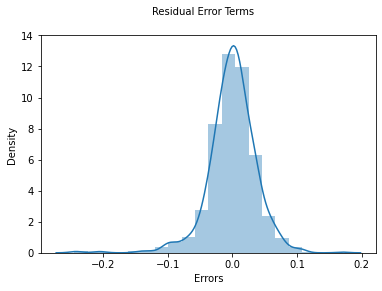

In [30]:
# Calculation y_pred on train dataset 
y_Pred = lm.predict(X_train_rfe)
res = y_train-y_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 10)                  
plt.xlabel('Errors', fontsize = 10) 

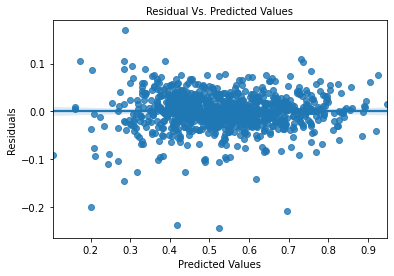

In [31]:
# Ploting the distribution of Predicted value and Residual to check the pattern
sns.regplot(x=y_Pred, y=res)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 10})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show()

In [32]:
#Validation on Test Set for Linear Model
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Creating X_test_new dataframe by dropping variables from X_test using final trained column information
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable to X_test_new dataset
X_test_rfe = sm.add_constant(X_test_new)
X_test_rfe.shape

(426, 51)

In [33]:
# Fitting test datset on the model and finding R2 
y_pred = lm.predict(X_test_rfe)
r2=r2_score(y_test, y_pred)
print("R2 on Test data : ",round(r2,3))

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train  :",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test   :",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train :",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test  :",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train :",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test  :",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 on Test data :  0.9
r2_train  : 0.9293731812758285
r2_test   : 0.9001100831869988
rss_train : 1.3879922920797583
rss_test  : 0.8072991716826889
mse_train : 0.0014005976711198367
mse_test  : 0.0018950684781283778


Model is not overfitting and satisfying the assumption of linear regression
R2 value on Train = 0.92
R2 value on Train = 0.90

# Lasso Regularization

In [34]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 3
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Printing the best hyperparameter alpha - Lasso

In [35]:
print('the best hyperparameter alpha:',lasso_cv.best_params_)

the best hyperparameter alpha: {'alpha': 0.0001}


In [36]:
# Fitting the data using best value of alpha(Lamda)
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

# Printing coefficient value of all the feature
len(lasso.coef_)
lasso.coef_

array([-1.57695104e-02,  7.80245060e-02,  1.72916982e-01,  1.30048218e-01,
        8.60263381e-03,  1.49836930e-02, -1.31748111e-02,  1.19938490e-02,
        0.00000000e+00,  1.22147448e-02,  1.00007743e-02,  5.45013430e-02,
        0.00000000e+00,  3.18206606e-03, -0.00000000e+00,  1.01261106e-01,
        1.99443443e-02,  0.00000000e+00,  2.82533207e-01,  1.00011296e-02,
        0.00000000e+00,  1.82170164e-02,  0.00000000e+00,  1.44016534e-02,
        2.66249750e-02,  7.62593728e-03,  6.31821020e-02,  3.22553995e-02,
        1.58186424e-02,  2.02433825e-02,  1.80855004e-02,  0.00000000e+00,
        5.24370859e-03, -1.09318054e-02, -1.02413993e-01,  1.05863311e-02,
        9.13853201e-03, -4.45081146e-03,  7.45629372e-03,  1.42695573e-02,
       -0.00000000e+00,  1.63707213e-02,  0.00000000e+00,  6.22972159e-04,
        0.00000000e+00,  4.37712891e-04,  8.66600572e-03, -8.66899678e-03,
       -0.00000000e+00, -1.19708173e-03,  0.00000000e+00, -0.00000000e+00,
        1.00581415e-02,  

 Lasso has mode the coefficient of many feature as 0

In [37]:
# Printing R2, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ",mse_test_lr)
metric3.append(mse_test_lr)

r2_train:  0.9347047642232111
r2_test:   0.9064244459695731
RSS_train: 1.28321345354178
RSS_test:  0.7562671956162852
MSE_train: 0.0012948672588716248
MSE_test:  0.0017752751070804816


In [38]:
# Printing coefficient of Lasso model made with different range of alphavalue
cv_result_lsso = pd.DataFrame(lasso_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.015335,0.002869,0.006004,0.000009,0.0001,{'alpha': 0.0001},-0.030973,-0.028515,-0.028584,-0.029357,0.001143,1,-0.023633,-0.025110,-0.024625,-0.024456,0.000615
1,0.008661,0.000947,0.004005,0.000005,0.0010,{'alpha': 0.001},-0.033213,-0.031353,-0.031512,-0.032026,0.000842,2,-0.029559,-0.031122,-0.030727,-0.030469,0.000664


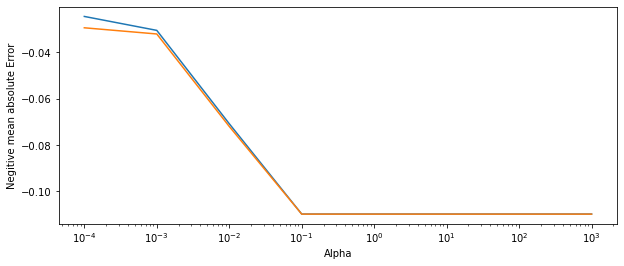

In [39]:
# Visualisation of different value of alpha on Negitive mean absolute Error
plt.figure(figsize=(10,4))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [40]:
# Checking R2 for the alpha 0.0001 on train and test set
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("R2 on Train Set =",r2_score(y_true=y_train,y_pred=y_train_pred))
print("R2 on Test  Set =",r2_score(y_true=y_test,y_pred=y_test_pred))

R2 on Train Set = 0.9347047642232111
R2 on Test  Set = 0.9064244459695731


In [41]:
# Finding top 10 features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
19,BsmtFullBath,0.282533
3,OverallCond,0.172917
4,MasVnrArea,0.130048
16,HeatingQC,0.101261
2,OverallQual,0.078025
0,MSSubClass,0.063864
27,GarageQual,0.063182
12,BsmtFinType2,0.054501
56,Neighborhood_Edwards,0.043651
72,Neighborhood_Timber,0.040604


In [42]:
# Features whose coefficiensts are non-zero in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.head()

,Features,Coefficient
0,MSSubClass,-0.0158
1,LotArea,0.0780
2,OverallQual,0.1729
3,OverallCond,0.1300
4,MasVnrArea,0.0086


## RIDGE REGRESSION

In [43]:
# Using RFE top 50 feature is selected
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Printing the best hyperparameter alpha - Ridge

In [44]:
print('the best hyperparameter alpha:',ridge_cv.best_params_)

the best hyperparameter alpha: {'alpha': 0.8}


In [45]:
# Fit the data to Ridge
ridge = Ridge(alpha=0.8)
ridge.fit(X_train_new, y_train)

# Printing number of feature used in Rasso final model.
print(len(ridge.coef_))
print(ridge.coef_)

50
[ 0.09647104  0.19203021  0.15025943 -0.02232585  0.10099782  0.01715338
  0.01655369  0.0893102   0.02759873  0.27063261  0.0321348   0.08432436
  0.03227997  0.02045978  0.02872876  0.0275873  -0.12878656  0.05079591
  0.01824072  0.04285815  0.02370136  0.01909567  0.04834123  0.02728369
  0.04607664 -0.02168639 -0.03909288  0.02088899  0.01721534 -0.0597129
  0.02370085 -0.01624847 -0.01750351  0.02540706 -0.01531748 -0.01624847
  0.01708527 -0.02553516 -0.02620456  0.02083246  0.01944052 -0.02935789
  0.03762163  0.0219108   0.01383041 -0.01325499  0.04677461  0.05272828
  0.01451655  0.02267869]


In [46]:
# Displaying  the mean scores
ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.8,-0.026557,-0.028556,1
9,0.7,-0.026514,-0.028556,2
8,0.6,-0.026474,-0.028560,3
11,0.9,-0.026601,-0.028561,4
7,0.5,-0.026432,-0.028570,5
12,1.0,-0.026646,-0.028570,6
6,0.4,-0.026390,-0.028584,7
5,0.3,-0.026349,-0.028608,8
4,0.2,-0.026307,-0.028647,9
3,0.1,-0.026268,-0.028707,10


In [47]:
# Printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test  :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test :",mse_test_lr)
metric2.append(mse_test_lr)

r2_train : 0.9286921628361218
r2_test  : 0.8992204227846299
RSS_train: 1.4013759947886213
RSS_test : 0.8144893078728702
MSE_train: 0.0014141029210783262
MSE_test : 0.0019119467320959395


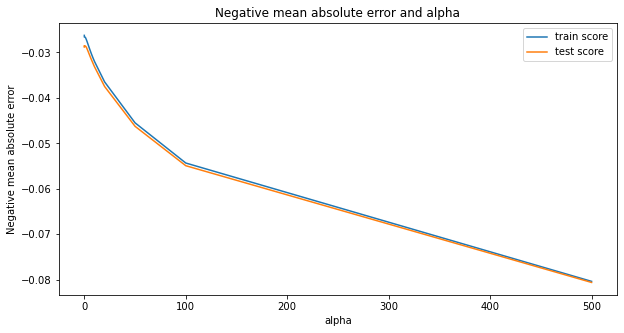

In [48]:
# Plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(10,5))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative mean absolute error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
# Finding top 10 parameters from ridge 
ridge_df = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
#ridge_df

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_new[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
10,Fireplaces,0.270633
2,OverallCond,0.192030
3,ExterCond,0.150259
5,BsmtFinSF2,0.100998
1,OverallQual,0.096471
8,HeatingQC,0.089310
12,GarageQual,0.084324
48,SaleCondition_AdjLand,0.052728
18,MSZoning_RH,0.050796
23,Neighborhood_NridgHt,0.048341


# Results of Linear , Ridge and Lasso Regression

In [50]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final = pd.concat([lr_metric,ls_metric,rg_metric],axis=1)
final = final.round(3)
final

,Metric,Linear Regression,Lasso Regression,Ridge Regression
0,R2 Score (Train),0.929,0.935,0.929
1,R2 Score (Test),0.900,0.906,0.899
2,RSS (Train),1.388,1.283,1.401
3,RSS (Test),0.807,0.756,0.814
4,MSE (Train),0.037,0.001,0.001
5,MSE (Test),0.044,0.002,0.002


### After observing the R2 score of Linear, Lasso and Ridge Regression on train and test , Lasso Regression is performing the best.

#### The optimal lamda/alpha value in case of Lasso and Ridge Regression is :
#### Ridge = 0.8
#### Lasso = 0.0001

In [51]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
19,BsmtFullBath,0.282533
3,OverallCond,0.172917
4,MasVnrArea,0.130048
16,HeatingQC,0.101261
2,OverallQual,0.078025
0,MSSubClass,0.063864
27,GarageQual,0.063182
12,BsmtFinType2,0.054501
56,Neighborhood_Edwards,0.043651
72,Neighborhood_Timber,0.040604


# SUBJECTIVE QUESTIONS

In [52]:
# Fitting Lasso Model
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

# Printing R2, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ",mse_test_lr)
metric3.append(mse_test_lr)

# Finding top 10 features whose coefficiensts are non-zero in a dataframe
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

0.9305908137015289
0.9046415404074
r2_train:  0.9305908137015289
r2_test:   0.9046415404074
RSS_train: 1.3640627926064903
RSS_test:  0.7706764396066004
MSE_train: 0.0013764508502588197
MSE_test:  0.0018090996234896722


,Feature,Coef
19,BsmtFullBath,0.280066
3,OverallCond,0.179230
4,MasVnrArea,0.123003
16,HeatingQC,0.100748
0,MSSubClass,0.073744
2,OverallQual,0.073105
27,GarageQual,0.067138
12,BsmtFinType2,0.053698
56,Neighborhood_Edwards,0.040027
146,SaleType_Oth,0.032514


In [53]:
# Fitting the data to Ridge
ridge = Ridge(alpha=0.16)
ridge.fit(X_train_new, y_train)
print(ridge.coef_)

# Printing R2 , RSS, MSE for test train sets

y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test  :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test :",mse_test_lr)
metric2.append(mse_test_lr)

# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Feature':X_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.head(10)

[ 0.1000452   0.19277548  0.15903456 -0.02801224  0.10212681  0.01715962
  0.01645841  0.09003861  0.02590745  0.28223931  0.02826904  0.08201522
  0.03599936  0.01884811  0.02688735  0.02997698 -0.13584379  0.06475949
  0.0318929   0.05547715  0.03777606  0.02959408  0.04889742  0.02700578
  0.04852    -0.02795465 -0.04284264  0.02028698  0.02478067 -0.07550382
  0.02427716 -0.02024478 -0.02634785  0.02798156 -0.02586369 -0.02024478
  0.02425659 -0.04223124 -0.02943664  0.01960758  0.0240502  -0.03893379
  0.04424677  0.03424938  0.01775235 -0.02026063  0.04740351  0.0698765
  0.01969494  0.02313417]
r2_train : 0.9293304581108904
r2_test  : 0.9000101147690653
RSS_train: 1.3888319083147573
RSS_test : 0.8081071052916763
MSE_train: 0.001401444912527505
MSE_test : 0.0018969650358959538


,Feature,Coefficient
0,LotArea,0.1000
1,OverallQual,0.1928
2,OverallCond,0.1590
3,ExterCond,-0.0280
4,BsmtFinSF1,0.1021
5,BsmtFinSF2,0.0172
6,BsmtUnfSF,0.0165
7,TotalBsmtSF,0.0900
8,HeatingQC,0.0259
9,GrLivArea,0.2822


## Comparing the results of Ridge and Lasso after double alpha value

In [54]:
resultTable = {'Metric':["R2 Score (Train) ", "R2Score (Test)", "RSS (Train)", "RSS (Test)", "MSE (Train)", "MSE (Test)"],
              'Ridge regression':metric2}

rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final = final.round(3)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score (Train),0.929,0.931
1,R2Score (Test),0.900,0.905
2,RSS (Train),1.389,1.364
3,RSS (Test),0.808,0.771
4,MSE (Train),0.001,0.001
5,MSE (Test),0.002,0.002


After observing the R2 score of Lasso and Ridge Regression on train and test , Lasso Regression is performing the best.
Lasso helps in feature reduction as the coefficient value of a feature became 0, Lasso has better edge over Ridge.

In [55]:
lasso_coef.sort_values(by='Coef',ascending=False).head()

,Feature,Coef
19,BsmtFullBath,0.280066
3,OverallCond,0.179230
4,MasVnrArea,0.123003
16,HeatingQC,0.100748
0,MSSubClass,0.073744


In [56]:
# Creating a new dataset and droping top 5 feature found using Lasso Regression
housing_Lasso = housing_7.copy()
housing_Lasso = housing_Lasso.drop(["BsmtFullBath", "OverallCond", "MasVnrArea", "HeatingQC", "MSSubClass"], axis=1)

# Train Test Split
df_train, df_test = train_test_split(housing_Lasso, train_size=0.7,test_size = 0.3, random_state=100)

# Scalling numeric feature

num_var1 = ['OverallQual', 'LotArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF','GrLivArea',  
            'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
            'MoSold', 'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old','ExterQual','ExterCond',
            'BsmtQual','BsmtCond','GarageQual','BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual','GarageFinish']

scaler = MinMaxScaler()
df_train[num_var1] = scaler.fit_transform(df_train[num_var1])
df_test[num_var1] = scaler.transform(df_test[num_var1])
print(df_train.shape)
df_train.head(2)

# Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

# Fitting Lasso Model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

# Printing R2, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ",mse_test_lr)
metric3.append(mse_test_lr)

# Finding top 10 features whose coefficiensts are non-zero in a dataframe
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

(991, 149)
0.925663485001623
0.8971996017590271
r2_train:  0.925663485001623
r2_test:   0.8971996017590271
RSS_train: 1.4608970317745102
RSS_test:  0.8308213581151602
MSE_train: 0.0014741645123859841
MSE_test:  0.0019502848782046015


,Feature,Coef
15,FullBath,0.272400
2,ExterQual,0.191217
0,LotArea,0.097880
13,2ndFlrSF,0.084903
1,OverallQual,0.075442
23,WoodDeckSF,0.066540
9,BsmtFinType2,0.059997
22,GarageQual,0.056773
51,Neighborhood_Edwards,0.052704
6,BsmtExposure,0.036430


A model derives its robustness from being capable of providing the same accuracy even with
changes in assumptions and independent variables. So, to make a model robust, the features
selected should be thoroughly verified and filtered using RFE, VIF and other techniques. In this
assignment, business metrics have become predictor variables in the original as well as reduced
model selection for lasso regression.

The accuracy of the model varies with the type and number of feature set input to it. A change in the
model input feature set can change the different metrics that are used as a measure of efficiency.
Adjusted R Squared metric can be used to explain how well independent features explain the
variability in the dependent variable/ target variable. For regression models, there are many metrics
that provide information on the model’s performance. A robust model will show lower susceptibility
to changes in the feature sets.

# DATA DICTIONARY FOR REFERENCE 